## 単回帰分析
回帰分析はデータ分析による予測の基礎となります。<br>
回帰分析のうち、単回帰分析は1つの目的変数を1つの説明変数で予測するもので、<br>
式で表すと以下となります。<br>
## Y＝aX＋b<br>
a（傾き）とb（Y切片）がわかれば、XからYを予測することができます。<br>


今回、単回帰分析で利用するデータは2007年のJリーグの順位と総収入、人件費です。<br>
具体的には<br>
①2007年J1 人件費vs 順位<br>
②2007年J1 総収入vs 順位<br>
③2007年J2 人件費vs 順位<br>
④2007年J2 総収入vs 順位<br>

## 重回帰分析

単回帰分析が、1つの目的変数を1つの説明変数で予測したのに対し、重回帰分析は1つの目的変数を複数の説明変数で予測しようというものです。<br>
身長から体重を予測するのが単回帰分析で、身長と腹囲と胸囲から体重を予測するのが重回帰分析です。<br>
式で表すと以下のようになります。<br>

## Y =b1X1+b2X2+b2X3+ .........

今回、重回帰分析で利用するデータは2007年のJ2リーグの順位と総収入、人件費です。<br>
具体的には<br>
⑤2007年J2 総収入、人件費vs 順位

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import sklearn


In [2]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

## <span style="color: blue; ">①2007年J1 人件費vs 順位</span>

In [3]:
df2007J1 = pd.read_csv("2007J1.csv")
df2007J1.head(30)

,クラブ,順位,総収入百万円,人件費百万円
0,鹿島,1,3983,1736
1,浦和,2,7964,2841
2,Ｇ大阪,3,3212,1927
3,清水,4,3180,1263
4,川崎,5,3105,1639
5,新潟,6,2661,1374
6,横浜ＦＭ,7,4909,1961
7,柏,8,3143,1693
8,磐田,9,3594,1575
9,神戸,10,1865,1317


In [4]:
# 説明変数に "人件費百万円" を利用
X = df2007J1.loc[:, ['人件費百万円']].values
 
# 目的変数に "順位" を利用
Y = df2007J1['順位'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))

[-0.00809096]
21.902548284027347
0.49342353571523323


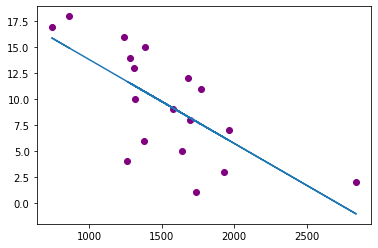

In [5]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y, c='purple')
 
# 回帰直線
plt.plot(X, clf.predict(X))

## <span style="color: blue; ">②2007年J1 総収入vs 順位</span>

In [6]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "総収入百万円" を利用
X = df2007J1.loc[:, ['総収入百万円']].values
 
# 目的変数に "順位" を利用
Y = df2007J1['順位'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))

[-0.00227357]
16.92698598147739
0.3687965219373789


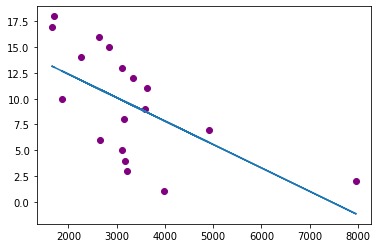

In [7]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y, c='purple')
 
# 回帰直線
plt.plot(X, clf.predict(X))

## <span style="color: blue; ">③2007年J2 総収入vs 順位</span>

In [8]:
df = pd.read_csv("2007J2.csv")
df.head(5)

sigma_ope = 2


In [9]:
import matplotlib.pyplot as plt

from statistics import stdev

x = df.loc[:, ['総収入百万円']].values
 
# 目的変数に "順位" を利用
y = df['順位'].values

me = np.mean(x)
sd = np.std(x)

hidari = me - sigma_ope*sd
migi = me + sigma_ope*sd

print(f"左側{hidari}、右側{migi}")

左側-293.6049271995812、右側2619.297234891889


In [10]:


# 説明変数に "人件費百万円" を利用
X = df.loc[:, ['総収入百万円']].values
 
# 目的変数に "順位" を利用
Y = df['順位'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
# print(clf.coef_)
 
# 切片 (誤差)
# print(clf.intercept_)
 
# 決定係数
print("決定係数は", clf.score(X, Y))

pre = clf.score(X, Y)

決定係数は 0.6497204201608042


# 総収入外れ値の除去をしてみる（2σ）

# 除去前

2619.297234891889


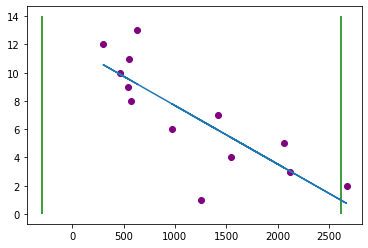

In [11]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y, c='purple')
 
# 回帰直線
plt.plot(X, clf.predict(X))

print(migi)

plt.vlines(migi, min(Y)-1, max(Y)+1, color="g")
plt.vlines(hidari, min(Y)-1, max(Y)+1, color="g")

# 除去処理

In [12]:

# 説明変数に "人件費百万円" を利用
x = df.loc[:, ['総収入百万円']].values

me = np.mean(x)
sd = np.std(x)

hidari = me - sigma_ope*sd
migi = me + sigma_ope*sd

print(migi)

df = df[df.総収入百万円 < migi]

2619.297234891889


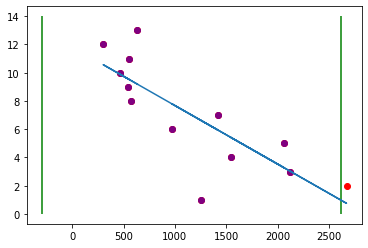

In [13]:
# 散布図（赤が外れ値）
plt.scatter(x, y, c='red')
plt.scatter(df["総収入百万円"], df["順位"], c='purple')

# 回帰直線
plt.plot(x, clf.predict(x))

plt.vlines(migi, min(y)-1, max(y)+1, color="g")
plt.vlines(hidari, min(y)-1, max(y)+1, color="g")

In [14]:
x = df.loc[:, ['総収入百万円']].values
y = df['順位'].values
 
# 予測モデルを作成
clf.fit(x, y)
 
# 決定係数
print("決定係数は", clf.score(x, y))
post = clf.score(x, y)

決定係数は 0.6055053226590699


In [19]:
dif = post - pre
print(f"決定係数が{round(dif, 3)}上昇しました")

決定係数が-0.044上昇しました


## <span style="color: blue; ">④2007年J2 総収入vs 順位</span>

In [43]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
X = df.loc[:, ['総収入百万円']].values
 
# 目的変数に "alcohol (アルコール度数)" を利用
Y = df['順位'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))

[-0.00414154]
11.815968418394236
0.6497204201608042


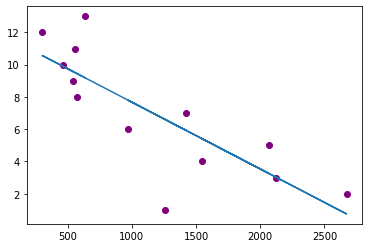

In [44]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y, c='purple')
 
# 回帰直線
plt.plot(X, clf.predict(X))

## 単回帰分析でわかったこと
#### 2007年のJ1,J2の決定係数の比較は以下
#### <span style="color: purple; ">2007年J1 人件費vs順位; 0.493</span>
#### <span style="color: purple; ">2007年J1 総収入vs順位; 0.369</span>
#### <span style="color: blue; ">2007年J2 人件費vs順位; 0.643</span>
#### <span style="color: blue; ">2007年J2 総収入vs順位; 0.649</span>
#### 分析結果から、人件費、総収入が順位に強く影響するのはJ2の方である
#### 逆にJ1ではそれ以外の要因が順位に影響すると予想される<br>

# 各指標のヒートマップ

In [27]:
import seaborn as sns

In [28]:
df = pd.read_csv("2007J2.csv")
df.head(5)

,クラブ,順位,総収入百万円,人件費百万円
0,札幌,1,1255,537
1,東京V,2,2672,1290
2,京都,3,2125,1051
3,仙台,4,1543,732
4,C大阪,5,2066,889


In [30]:
df = df.drop(["クラブ"], axis=1)

In [32]:
df.head(5)

,順位,総収入百万円,人件費百万円
0,1,1255,537
1,2,2672,1290
2,3,2125,1051
3,4,1543,732
4,5,2066,889


In [34]:
corr = df.corr()
print(corr)

              順位    総収入百万円    人件費百万円
順位      1.000000 -0.806052 -0.801685
総収入百万円 -0.806052  1.000000  0.987366
人件費百万円 -0.801685  0.987366  1.000000


https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

<AxesSubplot:>

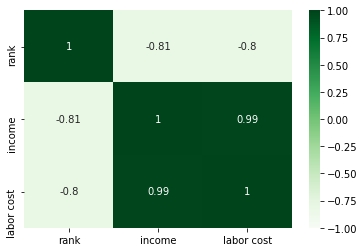

In [49]:
labels = ["rank", "income", "labor cost"]
sns.heatmap(corr, cmap='Greens', vmin=-1, vmax=1, annot=True, xticklabels=labels, yticklabels=labels)

## 重回帰分析

###   2007年J2の順位を目的変数して、その他の項目を説明変数として重回帰分析を行う

## <span style="color: blue; ">⑤2007年J2 総収入、人件費vs 順位</span>

In [ ]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "順位、クラブ以外とする
df2007J2_except_quality = df2007J2.drop(["順位","クラブ"], axis=1)
X = df2007J2_except_quality.values
x1 = df2007J2['人件費百万円'].values
x2 = df2007J2['総収入百万円'].values

# 目的変数に "順位" を利用
Y = df2007J2['順位'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":df2007J2_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

# パラメータ算出
reg_wn = clf.coef_                       # 偏回帰係数
print(reg_wn)
w_1 = clf.coef_[0]
w_2 = clf.coef_[1]
print(w_1)
print(w_2)

reg_w0 = clf.intercept_                  # 切片
print(reg_w0)
r2 = clf.score(X, Y)                     # 決定係数
print(r2)

## 上記の重回帰分析の結果から、順位は以下の式で表せる

## 順位=-0.0296639x総収入百万円-0.00250727x人件費百万円+11.81572217

## 次に、この重回帰分析の結果を３次元グラフに表してみます。<br>
■表示内容<br>
実際のデータ；Dataset<br>
回帰式;Regression plane<br>
として表す<br>


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# パラメータからモデルを可視化するために3次元データを作成する
X1 = np.arange(0, 1500, 200)                             # x軸を作成
X2 = np.arange(0, 2500, 500)                             # y軸を作成
XX, YY = np.meshgrid(X1, X2)                             # x軸とy軸からグリッドデータを作成
Z = reg_w0 + (reg_wn[0] * XX) + (reg_wn[1] * YY)   # 回帰平面のz値を作成
 
# データを用意する
#w0 = 1.0                              # 定数
#w1 = -1.4                             # 係数1
#w2 = -0.1                             # 係数2
#x1 = np.random.uniform(0, 10, 300)    # ノイズを含んだx軸を作成
#x2 = np.random.uniform(0, 10, 300)    # ノイズを含んだy軸を作成
 
# ノイズを含んだ平面点列データを作成
#y = w0 + (w1 * x1) + (w2 * x2) + np.random.uniform(0, 5, 300)

# ここからグラフ描画
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
#plt.rcParams['font.family'] = 'Times New Roman'
 
# グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)
 
# 軸のラベルを設定する。
ax1.set_xlabel('Labor-cost')
ax1.set_ylabel('Total-income')
ax1.set_zlabel('y')
 
# データプロットする。
ax1.scatter3D(x1, x2, Y, c='red',label='Dataset')
ax1.plot_wireframe(XX, YY, Z, label='Regression plane')
plt.legend()
 
# グラフを表示する。
plt.show()
plt.close()